# Assignment 3
**Due:**  March 19, 10am.


Make a copy of this notebook to  your Bitbucket mp248 repository in the file **Assignment.3/Assignment3.ipynb**.   

**Do your work in a copy of this i-python notebook.**

Do not add any extra files etc. But do add any external module or library files that you may be importing from. 

This notebooks asks you to create visualisations of serveral things. The assignment will be graded by executing your notebook on one of the servers using the MP248 option from the spawner menu. If you have developed your answer notebook elsewhere make sure you test your notebook on one of the course servers, so that you make sure your plots look exactly like you want them on those servers. Notebooks that do not run on the servers can only be partially graded.


## Problem 1

#### The Lorenz equations

One of the most celebrated sets of differential equations in physics is the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system):
$$ \frac{dx}{dt} = \sigma(y-x) $$ $$\frac{dy}{dt} = rx -y -xz$$ $$\frac{dz}{dt} = xy - bz$$ where $\sigma$, $r$ and $b$ are constants. (The names of these constants may seem arbirtrary and odd but are always used in these equations -- _for historical reasons_.

Read about these equations, when and why they were introduced? What special behaviour do they show?

1. Implement an explicit solution to the Lorenz equations. Always use the range from $t = 0$ to $t = 50 $ with the intial condition $(x,y,z) = (1,1,1)$, and consider three cases for $\sigma$, $r$ and $b$ as shown in the code cell below.
2. Using the explicit solution implementation from part 1.1 construct one plot of $x, y$ and $z$ as a function of time for each case for a time step size of $h=0.01$ and $h=0.0001$ for each case (6 plots in total). 
3. Create for the high-resolution cases a 3D line plot for each case using `from mpl_toolkits.mplot3d import Axes3D`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### "The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above."

They're a set of differential equations that were first introduced by Ed Lorenze in 1963 which were developed in appempt to model the unpredictable behaviour of weather systems. The system is generalized and represents the convective motion of a fluid cell which is warmed from above and cooled from below. 


In [2]:
def dx_dy_dx(x, y, z, dt, r, s, b):
    """
    Newton's iterative formula for the Lorenz differential equations
    
    :param x: x coordinate
    :param y: y coordinate
    :param z: z coordinate
    :param dt: time step
    :param r, s, b: constants
    :return x, y, z: x, y, z coordinates updated after one Newton iteration
    """
    x = x + dt*(s*(y-x))
    y = y + dt*(r*x-y-x*z) 
    z = z + dt*(x*y-b*z)
    return x, y, z

def lorenz_plot(dt, case, dim=2):
    """
    Plotting function for the Lorenz equations. Can plot x, y, z against time in 2D, for x vs y vs z in 3D.
    
    :param dt: time step for Newton's iterative method
    :param case: set of constants
    :param dim: plotting dimensions 
    """
    if case == 1:
        r = 28.0
        s = 10.0
        b = 8.0 / 3.0
    elif case == 2:
        r = 38.0
        s = 7.0
        b = 7.0 / 3.0
    elif case == 3:
        r = 28.0
        s = 12.0
        b = 2.0 / 3.0
    
    t = 0
    t_max = 50
    time = np.arange(t, t_max, dt)
    x = 1; x_values = []
    y = 1; y_values = []
    z = 1; z_values = []
    while t < t_max:
        x, y, z = dx_dy_dx(x, y, z, dt, r, s, b)
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
        t += dt
    if dim == 2:
        try:
            plt.plot(time, x_values[1:], 'r.', alpha=0.35, label='x')
            plt.plot(time, y_values[1:], 'g.', alpha=0.35, label='y')
            plt.plot(time, z_values[1:], 'b.', alpha=0.35, label='z')
        except ValueError:
            plt.plot(time, x_values, 'r.', label='x')
            plt.plot(time, y_values, 'g.', label='y')
            plt.plot(time, z_values, 'b.', label='z')
        finally:
            plt.title("Lorenz equation: case {}, step {}".format(case, dt))
            plt.xlabel("Time (t)")
            plt.ylabel("x, y, z")
            plt.legend(loc=1)
    elif dim == 3:
        fig = figure(figsize=(7,7))
        ax = fig.gca(projection='3d')
        ax.plot(x_values, y_values, z_values)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title("Lorenz equation 3D: case {}, step {}".format(case, dt))

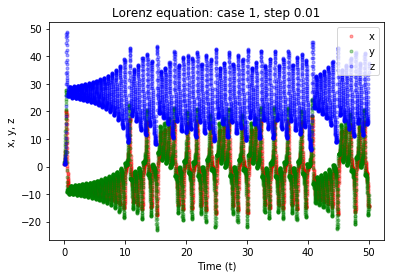

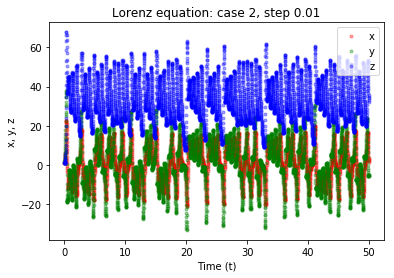

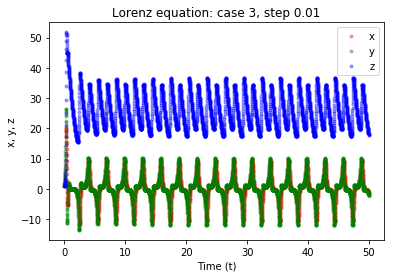

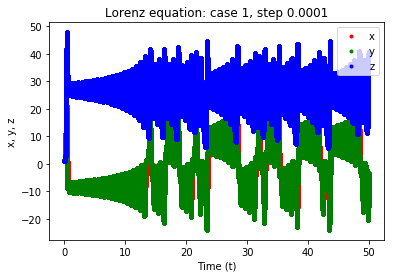

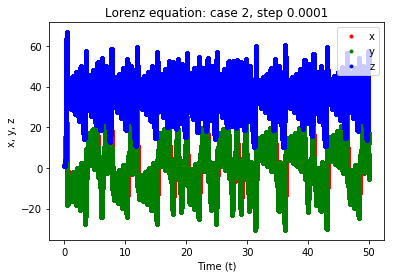

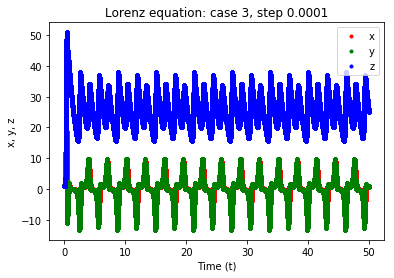

In [3]:
lorenz_plot(0.01, 1)
figure(2)
lorenz_plot(0.01, 2)
figure(3)
lorenz_plot(0.01, 3)
figure(4)
lorenz_plot(0.0001, 1)
figure(5)
lorenz_plot(0.0001, 2)
figure(6)
lorenz_plot(0.0001, 3)

In [4]:
from mpl_toolkits.mplot3d import Axes3D

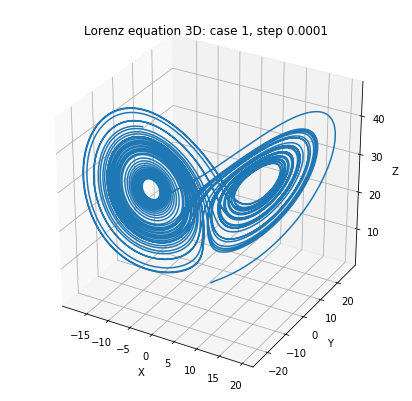

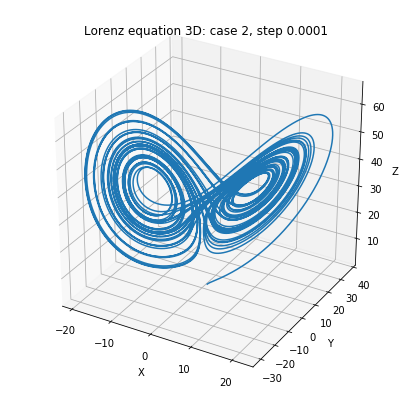

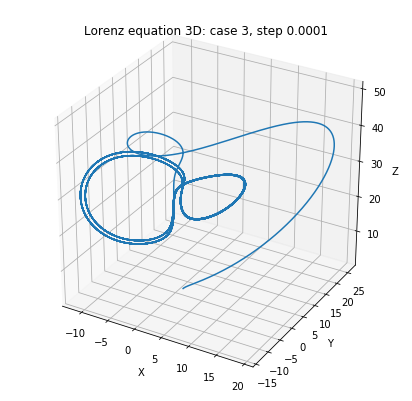

In [5]:
figure(7)
lorenz_plot(0.0001, 1, dim=3)
figure(8)
lorenz_plot(0.0001, 2, dim=3)
figure(9)
lorenz_plot(0.0001, 3, dim=3)

Suggestion for further study (not graded): Setup the same solution with `scipy.integrate.odeint`. The solution can be found [Wikipedia's Lorenz system page](https://en.wikipedia.org/wiki/Lorenz_system). Students are encouraged to first try to figure out the solution yourelf. 

## Problem 2
1. Construct a helix in 3D with the circular component in x, y and the stretch component in z direction. In each direction the values span the range $[-1,1]$ and the helix has 5 rotations. Make a plot in 3D using `from mpl_toolkits.mplot3d import Axes3D` with the view `ax.view_init(elev=45, azim=30)`.
2. Perform a shear transformation in the x direction that is proporitional to $1.5y$ of the helix and plot with view `ax.view_init(elev=80, azim=10)`.
3. Perform a rotation around the y-axis by $33\deg$.

In [6]:
def helix_points(r, n=100):
    """
    Generates array of helix points
    
    :param r: helix radius
    :param n: number of points to use (default 100)
    :return: helix points, array-like
    """
    return array([(np.cos(4*pi*x/n) * r, np.sin(4*pi*x/n) * r, x/n) for x in range(-n+1, n+1)])

def shear_x(vector, m):
    """
    Shears a matrix along the x axis
    
    :param vector: input matrix
    :param m: shear factor
    :return: resulting matrix after applying the shear
    """
    shear_matrix = np.array([[1,m,0],[0,1,0],[0,0,1]])
    
    return np.dot(shear_matrix, vector.T).T

def rotate_y(vector, theta):
    """
    Rotates a matrix around the y axis
    
    :param vector: input matrix
    :param theta: rotation angle, in radians 
    :return: resulting matrix after applying the rotation
    """
    rotation_matrix = np.array([[np.cos(theta), 0, np.sin(theta)],
                                [0 , 1, 0],
                                [-np.sin(theta), 0, np.cos(theta)]])
    
    return np.dot(rotation_matrix, vector.T).T

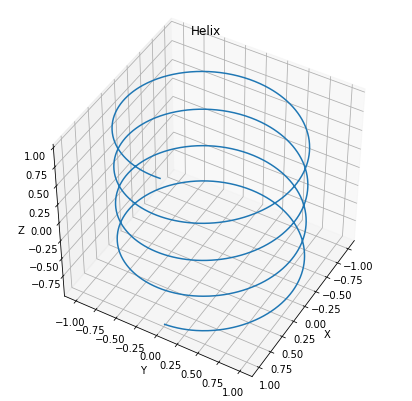

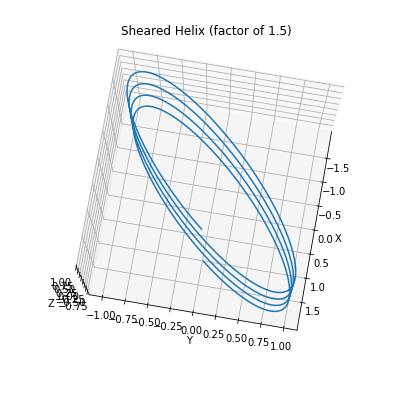

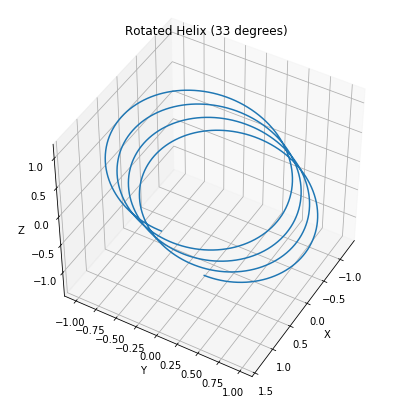

In [7]:
n = 1000
points = helix_points(1, n)
x, y, z = points[:, 0], points[:, 1], points[:, 2]

fig = figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(elev=45, azim=30)
ax.plot(x, y, z)
ax.set_title('Helix')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

sheared = shear_x(points, 1.5)
x, y, z = sheared[:, 0], sheared[:, 1], sheared[:, 2]
fig = figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(elev=80, azim=10)
ax.plot(x, y, z)
ax.set_title('Sheared Helix (factor of 1.5)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

rotate = rotate_y(points, 33*np.pi/180)
x, y, z = rotate[:, 0], rotate[:, 1], rotate[:, 2]
fig = figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(elev=45, azim=30)
ax.plot(x, y, z)
ax.set_title('Rotated Helix (33 degrees)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


## Problem 3: 

Given the equations for the voltage difference at each junction point for the circuit of resistors discussed in class (Part.III, unit 3):
* Simplify and sort the set of equations presented in class for the voltages.
* Setup coefficient matrix $A$ and RHS vector $\vec{u}$.
* Use your own Gaussian elimination routine created in the Lab to solve for $\vec{v}$.
* Use an appropriate numpy library to solve the same set of equations. 

- v1: $(V_1 - V_3) + (V_1 - 0) + (V_1 - V_2) + (V_1 - V_4) = 0$
- v2: $(V_2 - V_4) + (V_2 - 0) + (V_2 - V_1) = 0$
- v3: $(V_3 - V_4) + (V_3 -5) + (V_3 - V_1) = 0$
- v4: $(V_4 - 5) + (V_4 - V_3) + (V_4 - V_2) + (V_4 - V_1) = 0$

In [1]:
import sympy as sp

In [2]:
def gausselim(AA,uu):
    '''
    Naive Gaussian elimination with backsubstution
    
    This function solves the equation u = A * v, where v, u vectors 
    of length N and A a NxN matrix.
    
    :param AA: Left Hand Side matrix, array-like
    :param uu: Right Hand Side vector, array-like
    :return v: solution vector, array-like
    '''
    A = AA.astype(float)
    u = uu.astype(float)
    
    n = len(u)
    v = np.zeros(n)
    for i in range(n):
        for j in range(i+1, n):
            m = A[j][i]/A[i][i]
            for k in range(i, n):
                A[j][k] = A[j][k]-m*A[i][k]
            u[j] = u[j]-m*u[i]

    v[-1] = u[-1]/A[-1][-1]
    s = 0
    for i in range(n-2, -1, -1):
        s = u[i]
        for j in range(i+1, n):
            s -= A[i][j]*v[j]
        v[i] = s/A[i][i]
    
    return v

In [3]:
v1, v2, v3, v4 = sp.symbols('V1 V2 V3 V4')

a = sp.simplify((v1 - v3) + (v1 - 0) + (v1 - v2) + (v1 - v4))
b = sp.simplify((v2 - v4) + (v2 - 0) + (v2 - v1))
c = sp.simplify((v3 - v4) + (v3 - 5) + (v3 - v1))
d = sp.simplify((v4 - 5) + (v4 - v3) + (v4 - v2) + (v4 - v1))

A, u = sp.linear_eq_to_matrix((a, b, c, d), v1, v2, v3, v4)
sp.pprint(A)
sp.pprint(u)

# convert to np arrays for function compatibility 
A = array(A)
u = array(u)

gausselim(A, u)

⎡4   -1  -1  -1⎤
⎢              ⎥
⎢-1  3   0   -1⎥
⎢              ⎥
⎢-1  0   3   -1⎥
⎢              ⎥
⎣-1  -1  -1  4 ⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣5⎦


array([ 2.        ,  1.66666667,  3.33333333,  3.        ])

In [4]:
np.linalg.solve(A.astype(float), u.astype(float)).T

array([[ 2.        ,  1.66666667,  3.33333333,  3.        ]])